In [93]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split as tts
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor

In [46]:
df = pd.read_excel('cleaned_Automobile.xlsx')
df.head()

,symboling,normalized-losses,num-of-doors,engine-location,wheel-base,curb-weight,num-of-cylinders,engine-size,bore,stroke,...,body-style_sedan,make_honda,make_mazda,make_mitsubishi,make_nissan,make_peugot,make_subaru,make_toyota,make_volkswagen,make_volvo
0,3,122,2,0,88.6,2548,4,130,3.47,2.68,...,0,0,0,0,0,0,0,0,0,0
1,3,122,2,0,88.6,2548,4,130,3.47,2.68,...,0,0,0,0,0,0,0,0,0,0
2,1,122,2,0,94.5,2823,6,152,2.68,3.47,...,0,0,0,0,0,0,0,0,0,0
3,2,164,4,0,99.8,2337,4,109,3.19,3.40,...,1,0,0,0,0,0,0,0,0,0
4,2,164,4,0,99.4,2824,5,136,3.19,3.40,...,1,0,0,0,0,0,0,0,0,0


In [47]:
df.dtypes

symboling                 int64
normalized-losses         int64
num-of-doors              int64
engine-location           int64
wheel-base              float64
curb-weight               int64
num-of-cylinders          int64
engine-size               int64
bore                    float64
stroke                  float64
compression-ratio       float64
horsepower              float64
peak-rpm                float64
city-mpg                  int64
highway-mpg               int64
price                   float64
fuel-type_gas             int64
aspiration_std            int64
area                    float64
drive-wheels_4wd          int64
drive-wheels_fwd          int64
OHC_status                int64
Fuel_system_type          int64
body-style_hatchback      int64
body-style_sedan          int64
make_honda                int64
make_mazda                int64
make_mitsubishi           int64
make_nissan               int64
make_peugot               int64
make_subaru               int64
make_toy

# Linear Regression

In [48]:
df_lin = df.copy()

#### Normalizing dataset using MinMaxScalar

In [49]:
columns = list(df_lin)

In [50]:
scalar = MinMaxScaler()
df_lin = scalar.fit_transform(df_lin)

C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [51]:
auto_lin = pd.DataFrame(df_lin)
auto_lin.head()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,1.0,0.298429,0.0,0.0,0.058309,0.411171,0.2,0.260377,0.664286,0.290476,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.298429,0.0,0.0,0.058309,0.411171,0.2,0.260377,0.664286,0.290476,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.6,0.298429,0.0,0.0,0.230321,0.517843,0.4,0.343396,0.100000,0.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.8,0.518325,1.0,0.0,0.384840,0.329325,0.2,0.181132,0.464286,0.633333,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.8,0.518325,1.0,0.0,0.373178,0.518231,0.3,0.283019,0.464286,0.633333,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
auto_lin.columns = columns

In [53]:
auto_lin.head()

,symboling,normalized-losses,num-of-doors,engine-location,wheel-base,curb-weight,num-of-cylinders,engine-size,bore,stroke,...,body-style_sedan,make_honda,make_mazda,make_mitsubishi,make_nissan,make_peugot,make_subaru,make_toyota,make_volkswagen,make_volvo
0,1.0,0.298429,0.0,0.0,0.058309,0.411171,0.2,0.260377,0.664286,0.290476,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.298429,0.0,0.0,0.058309,0.411171,0.2,0.260377,0.664286,0.290476,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.6,0.298429,0.0,0.0,0.230321,0.517843,0.4,0.343396,0.100000,0.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.8,0.518325,1.0,0.0,0.384840,0.329325,0.2,0.181132,0.464286,0.633333,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.8,0.518325,1.0,0.0,0.373178,0.518231,0.3,0.283019,0.464286,0.633333,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Feature selection using Correlation HeatMap

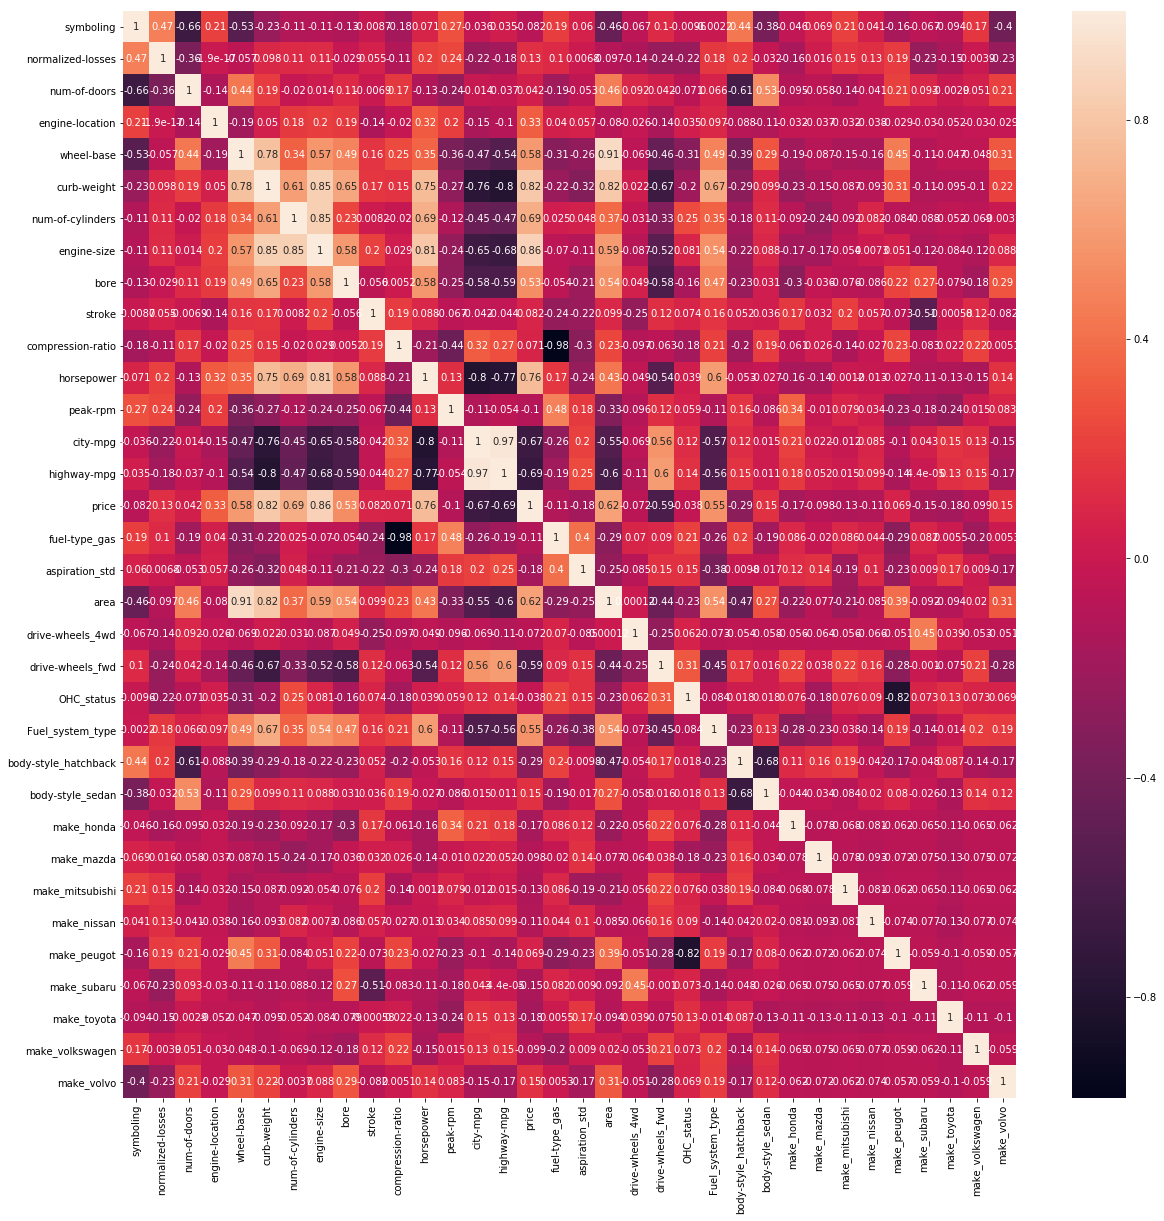

In [54]:
plt.figure(figsize=(20,20))
corr = auto_lin.corr()
sns.heatmap(corr,annot=True)

In [55]:
corr_target = abs(corr['price'])
relevent_features = corr_target[corr_target > 0.6]
relevent_features

curb-weight         0.820825
num-of-cylinders    0.687770
engine-size         0.861752
horsepower          0.757917
city-mpg            0.667449
highway-mpg         0.690526
price               1.000000
area                0.623298
Name: price, dtype: float64

In [56]:
X_heatmap = auto_lin[['curb-weight','engine-size','horsepower','highway-mpg','area']]
y_heatmap = auto_lin['price']

In [57]:
X_h_train, X_h_test, y_h_train, y_h_test= tts(X_heatmap, y_heatmap, test_size = 0.25, random_state = 42)

In [58]:
lin_reg = LinearRegression()
lin_reg.fit(X_h_train,y_h_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [59]:
y_h_pred = lin_reg.predict(X_h_test)

In [60]:
r2_score(y_h_pred,y_h_test)

0.7146702190153491

##### Accuracy of the model using Heatmap correlation -- 71%

### Feature Selection using Backward Elimination

In [61]:
def backward_elimination(Y,X):
    cols = list(X.columns)
    while len(cols) > 0:
        p = []
        X_new = X[cols]
        X_new = sm.add_constant(X_new)
        model = sm.OLS(Y, X_new).fit()
        pvalues = pd.Series(model.pvalues.values[1:],index = cols)
        max_pvalues = max(pvalues)
        feature_with_max_pvalues = pvalues.idxmax()
        if max_pvalues > 0.05:
            cols.remove(feature_with_max_pvalues)
        else:
            return cols
            break

In [62]:
_X = auto_lin.drop(['price'],1)
_y = auto_lin['price']

In [63]:
feature_selected = backward_elimination(_y,_X)

C:\Users\Ajay\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [64]:
feature_selected

['engine-location',
 'wheel-base',
 'curb-weight',
 'engine-size',
 'stroke',
 'horsepower',
 'peak-rpm',
 'aspiration_std',
 'drive-wheels_fwd',
 'OHC_status',
 'body-style_sedan',
 'make_mitsubishi',
 'make_nissan',
 'make_peugot',
 'make_subaru',
 'make_toyota',
 'make_volvo']

In [65]:
_X_fe = df[feature_selected]
_y_fe = _y

In [66]:
_X_train, _X_test, _y_train, _y_test = tts(_X_fe, _y_fe, test_size = 0.3, random_state = 42)

In [67]:
lin_reg.fit(_X_train, _y_train)
_y_pred_fe = lin_reg.predict(_X_test)

In [68]:
r2_score(_y_pred_fe,_y_test)

0.8599203707387282

##### Accuracy of the model using Backward Elimination = 86%

### Feature Selection using Recursive Feature Elimination 

In [69]:
X_rfe = auto_lin.drop(['price'],1)
y_rfe = auto_lin['price']

In [73]:
rfe = RFE(lin_reg,6)
rfe = rfe.fit(X_rfe,y_rfe)

In [76]:
list(X_rfe)

['symboling',
 'normalized-losses',
 'num-of-doors',
 'engine-location',
 'wheel-base',
 'curb-weight',
 'num-of-cylinders',
 'engine-size',
 'bore',
 'stroke',
 'compression-ratio',
 'horsepower',
 'peak-rpm',
 'city-mpg',
 'highway-mpg',
 'fuel-type_gas',
 'aspiration_std',
 'area',
 'drive-wheels_4wd',
 'drive-wheels_fwd',
 'OHC_status',
 'Fuel_system_type',
 'body-style_hatchback',
 'body-style_sedan',
 'make_honda',
 'make_mazda',
 'make_mitsubishi',
 'make_nissan',
 'make_peugot',
 'make_subaru',
 'make_toyota',
 'make_volkswagen',
 'make_volvo']

In [75]:
print(rfe.support_)
print(rfe.ranking_)

[False False False  True False  True  True  True  True  True False False
 False False False False False False False False False False False False
 False False False False False False False False False]
[19 23 25  1  2  1  1  1  1  1  4  8  7 14 27  5 12  9 10 11  6 26 24 20
 28 22 17 18  3 16 15 21 13]


In [78]:
_X_rfe = auto_lin[['engine-location','curb-weight','num-of-cylinders','engine-size','bore','stroke']]
_y_rfe = auto_lin['price']

In [79]:
_X_rfe_train, _X_rfe_test, _y_rfe_train, _y_rfe_test = tts(_X_rfe, y_rfe, test_size = 0.3, random_state = 42)

In [80]:
lin_reg.fit(_X_rfe_train, _y_rfe_train)
_y_pred_rfe = lin_reg.predict(_X_rfe_test)

In [81]:
r2_score(_y_pred_rfe,_y_rfe_test)

0.7737981032400588

##### Accuracy of the model using RFE -- 77%

# ElasticNet Regression Model

In [83]:
elastic_net = ElasticNet(normalize=True)

In [84]:
df_elastic = df.copy()

In [85]:
X_elastic  = df_elastic.drop(['price'],1)
y_elastic = df_elastic['price']

In [86]:
model = GridSearchCV(cv = 10 , estimator=elastic_net, param_grid= {'alpha':[0,1,2,3,4,5],'l1_ratio':np.arange(0.1,0.9,0.1)})
model_elastic = model.fit(X_elastic,y_elastic)

C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Use

C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Use

C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\li

C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Use

C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Use

C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:740: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self.best_estimator_.fit(X, y, **fit_params)
C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precis

In [87]:
model_elastic.best_estimator_

ElasticNet(alpha=0, copy_X=True, fit_intercept=True, l1_ratio=0.1,
      max_iter=1000, normalize=True, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [88]:
model_elastic.best_params_

{'alpha': 0, 'l1_ratio': 0.1}

In [89]:
model_elastic.best_score_

-0.624564707019059

##### Accuracy of the model using ElasticNet -- -62%

# KNN Regressor

In [90]:
X_knn = auto_lin.drop(['price'],1)
y_knn = auto_lin['price']

In [91]:
X_knn_train, X_knn_test, y_knn_train, y_knn_test = tts(X_knn, y_knn, test_size=0.3, random_state=42)

In [94]:
r2_list = []

for K in range(3,12):
    knn = KNeighborsRegressor(n_neighbors=K)
    knn.fit(X_knn_train,y_knn_train)
    y_pred = knn.predict(X_knn_test)
    r2 = r2_score(y_knn_test,y_pred)
    r2_list.append(r2)
r2_list

[0.8149953611245451,
 0.8072571467290145,
 0.8124174346213584,
 0.7974644891221953,
 0.7922563766267332,
 0.775027983460277,
 0.7643921491860373,
 0.7482391040893088,
 0.7496822440501589]

Text(0.5, 1.0, 'Predict R-Squared value based on K')

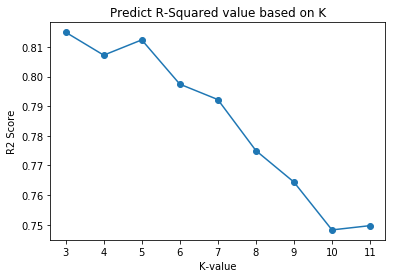

In [95]:
plt.plot(range(3,12),r2_list,marker = 'o')
plt.xlabel('K-value')
plt.ylabel('R2 Score')
plt.title('Predict R-Squared value based on K')

##### Accuracy of the model using KNN regressor -- 81.5%